# Data Analysis

In [123]:
import pandas as pd
import json
import ast

df_repositories = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IPI-projeto-pesquisa/repositories.csv')
df_size = df_repositories['id'].size
df_repositories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2888 non-null   int64 
 1   Unnamed: 0.1  2888 non-null   int64 
 2   id            2888 non-null   int64 
 3   full_name     2888 non-null   object
 4   description   2246 non-null   object
 5   branches      2888 non-null   object
 6   languages     2888 non-null   object
 7   stats         2888 non-null   object
 8   created_at    2778 non-null   object
dtypes: int64(3), object(6)
memory usage: 203.2+ KB


### Checking if the repos are using Work Flow branches

In [124]:
repos_with_workflow = 0
WORKFLOW_BRANCHES = ['main', 'master', 'dev', 'develop', 'feature', 'bugfix', 'support', 'hotfix', 'release']
for repo_branches in df_repositories['branches'] :
  branches_array = ast.literal_eval(repo_branches)
  workflow_similarity = 0

  for branches in branches_array :
    if type(branches) == str:
      break
    branch_name = branches.get('name')
    
    if branch_name in WORKFLOW_BRANCHES :
      workflow_similarity += 1
  
  if workflow_similarity > 1 :
    repos_with_workflow += 1
    #print('workflow similarity: ' + str(workflow_similarity) + '\n')

repos_workflow = list(range(2))
repos_workflow[0] = repos_with_workflow
repos_workflow[1] = df_size - repos_with_workflow
print('repos with workflow: ' + str(repos_workflow[0]))
print('repos without workflow: ' + str(repos_workflow[1]))

repos with workflow: 161
repos without workflow: 2727


### Data visualization on a Pie Chart
Showing the percentage of repositories that are using a workflow management against those ones that are not using it.

In [125]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x7fab9e0c0f10>,
 [Text(1.280113420146465, 0.22651629425036957, 'Repos with workflow'),
  Text(-1.083172896213238, -0.19166762091972084, 'Repos without workflow')],
 [Text(0.7877621047055169, 0.13939464261561202, '5.57%'),
  Text(-0.5908215797526752, -0.10454597504712045, '94.43%')])

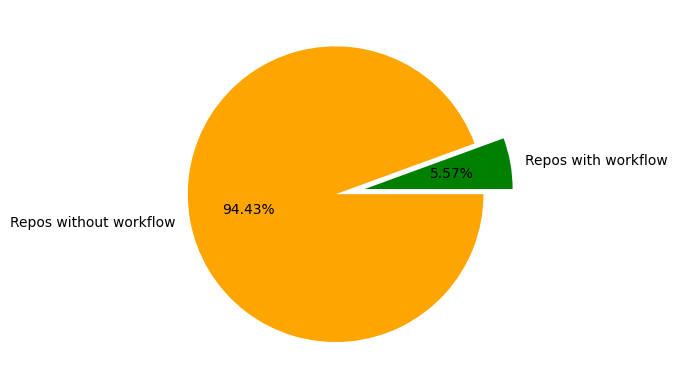

In [126]:
pieces_labels = ['Repos with workflow', 'Repos without workflow']
exp = [0.2, 0]
pieces_colors = ['green', 'orange']
plt.pie(repos_workflow, labels=pieces_labels, explode=exp, autopct='%2.2f%%', colors=pieces_colors)

### Programming language
Bars graph showing the distribution of commits per language

In [127]:
from collections import Counter

In [128]:
lang_array = list()
for item in df_repositories['languages'] :
  languages = ast.literal_eval(item)
  if languages.get('message') == 'Not Found' or languages == {} :
    continue
  #print('\nrepo languages count: ' + str(len(languages)))
  #print(languages)

  for lang in languages :
    lang_array.append(lang)
    #print(lang)
  
#print(lang_array)
countered_lang_dict = Counter(lang_array)
most_common_langs_dict = countered_lang_dict.most_common(10)

most_common_langs = list()
most_common_langs_count = list()

for item in most_common_langs_dict :
  most_common_langs.append(item[0])
  most_common_langs_count.append(item[1])

print(most_common_langs)
print(most_common_langs_count)

['JavaScript', 'HTML', 'CSS', 'Python', 'Shell', 'Java', 'Ruby', 'Makefile', 'C++', 'C']
[961, 953, 733, 677, 666, 344, 310, 288, 277, 249]


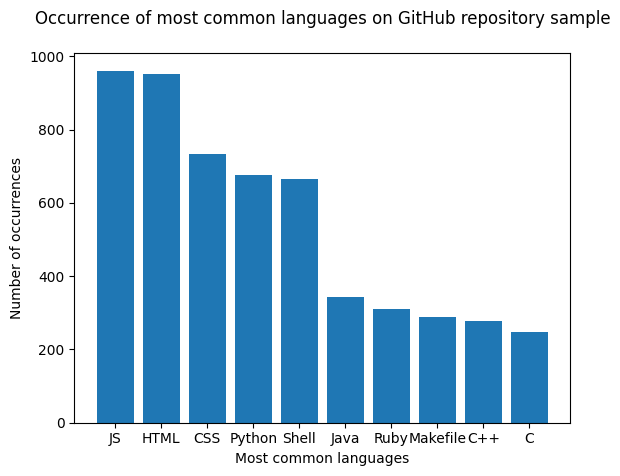

In [129]:
most_common_langs[0] = 'JS' # 'JavaScript' label is too long to be displayed on the X label
plt.style.use('default')
plt.bar(most_common_langs, height=most_common_langs_count)
plt.title('Occurrence of most common languages on GitHub repository sample\n')
plt.xlabel('Most common languages')
plt.ylabel('Number of occurrences')
plt.show()